Using the [Bike Sharing Demand](https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv) dataset available through Kaggle, we will train an Random Forest Regressor.

This notebook is a [DataCamp](https://learn.datacamp.com/) exercise

In [24]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')

In [3]:
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [6]:
df.columns

Index(['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'instant', 'mnth', 'yr', 'Clear to partly cloudy',
       'Light Precipitation', 'Misty'],
      dtype='object')

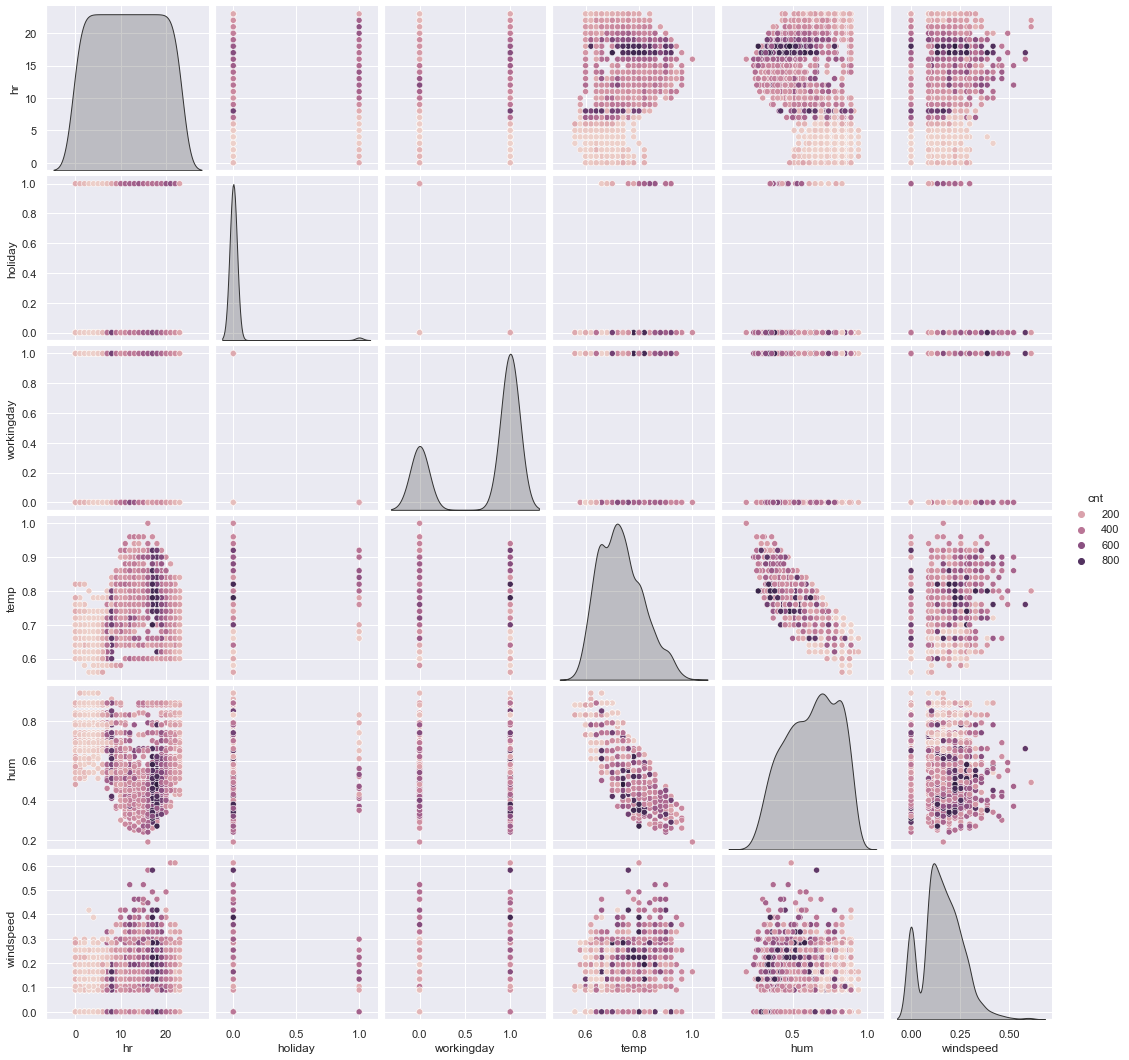

In [13]:
# Plot out pairplots for 6 columns at a time with 'cnt' as the target
excol = ['instant', 'mnth', 'yr', 'Clear to partly cloudy','Light Precipitation', 'Misty']
df1 = df.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df1, hue='cnt',diag_kws={"hue": None, "color": ".2"})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


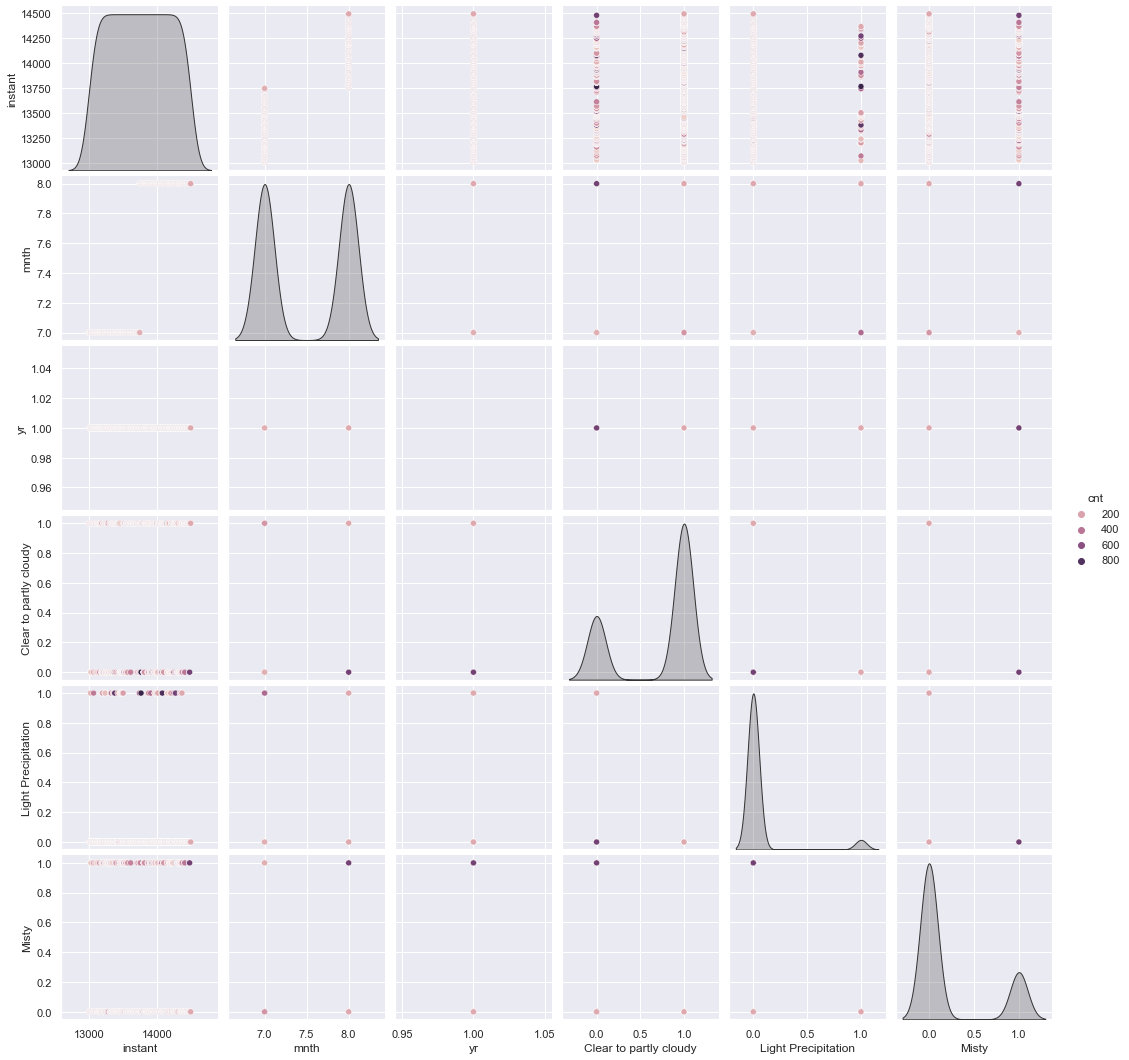

In [14]:
# Plot out pairplots for 6 columns at a time with 'cnt' as the target
excol = ['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']
df2 = df.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df2, hue='cnt', diag_kws={"hue": None, "color": ".2"})
plt.show()

## Train on all available features

In [15]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [16]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train an RF regressor (since 'cnt' is a continuous variable)

In [18]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=42)

In [19]:
# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

## Evaluate the RF regressor using RMSE

In [20]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [21]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [22]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

In [23]:
# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 57.44


## Compare RMSE of a single CART (dt)

In [35]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=25, min_samples_leaf=0.04, random_state=42)

In [36]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, min_samples_leaf=0.04, random_state=42)

In [37]:
# Predict the test set labels
y_pred_dt = dt.predict(X_test)

In [38]:
# Evaluate the test set RMSE
rmse_test_dt = MSE(y_test, y_pred_dt)**(1/2)

In [39]:
# Print the rmse_test_dt
print(f"Test set RMSE of dt: {rmse_test_dt:.2f}")

Test set RMSE of dt: 99.37


The training on a single CART for the same dataset has almost twice the RMSE as the rf!

## Visualize the features importances for the rf model

In [41]:
# Create a pd.Series of features importances to be able to plot a horizontal bar chart
importances = pd.Series(data=rf.feature_importances_,
                       index=X_train.columns)

In [42]:
# Sort importances series
importances_sorted = importances.sort_values()

Text(0.5, 1.0, 'Features importances')

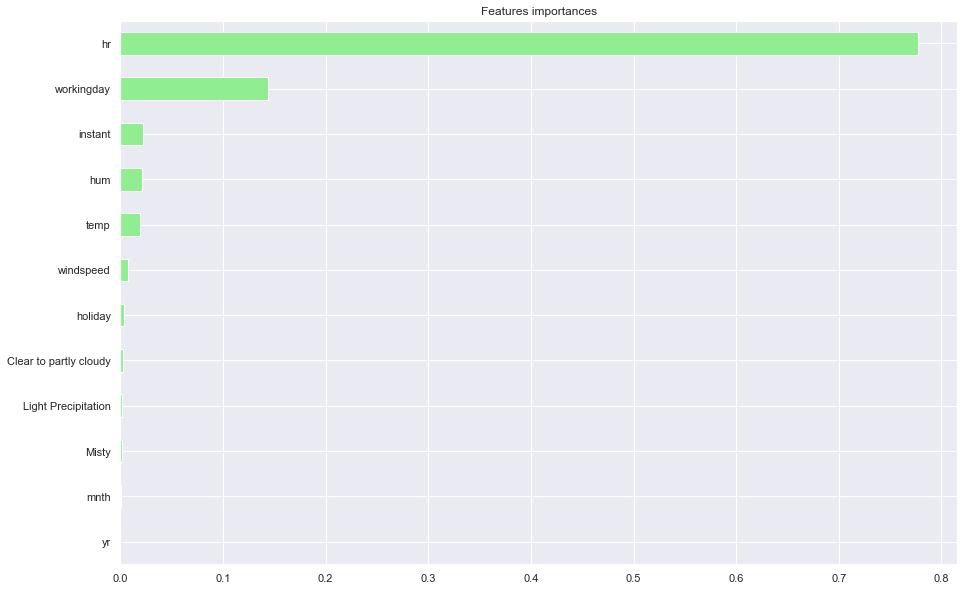

In [47]:
# Draw a horizontal barplot of importances_sorted
fig, ax = plt.subplots(figsize=(15,10))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features importances')

`hr` and `workingday` are the most important features of the rf model - they add up to more than 90% 



gbt Test set RMSE: 3.94
The Gradient Boosting Regressor had a higher RMSE than the Random Forest Regressor 3.94 vs. 3.78 respectively

## Gradient Boosting Regressor

In [48]:
# Import dependencies
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [51]:
# Instantiate a GradientBoostingRegressor 'gb'
gb = GradientBoostingRegressor(n_estimators=200, max_depth=4, random_state=42)

In [52]:
# Fit 'gb' to the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [53]:
# Predict the test set labels
y_pred_gb = gb.predict(X_test)

In [55]:
# Evaluate the test set RMSE
rmse_test_gb = MSE(y_test, y_pred_gb)**(1/2)

In [56]:
# Print the test set RMSE
print(f"gb Test set RMSE: {rmse_test_gb:.2f}")

gb Test set RMSE: 56.38


## Stochastic Gradient Boosting

In [57]:
# Instantiate 'sgbr'
sgbr = GradientBoostingRegressor(max_depth=4,
                                subsample=0.9,
                                max_features=0.75,
                                n_estimators=200,
                                random_state=42)

In [58]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, max_features=0.75, n_estimators=200,
                          random_state=42, subsample=0.9)

In [59]:
# Predict test set labels
y_pred_sgbr = sgbr.predict(X_test)

In [60]:
# Compute test set RMSE
rmse_test_sgbr = MSE(y_test, y_pred_sgbr)**(1/2)

In [61]:
# Print rmse_test_sgbr
print(f" sgbr Test set RMSE: {rmse_test_sgbr:.3f}")

 sgbr Test set RMSE: 57.984


Stochastic Gradient Boosting didn't perform as well as 